Immporting the dependencies...

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection & Data Processing...

In [2]:
sonarData = pd.read_csv(r"C:\Users\omi84\OneDrive\Desktop\Anveshan\Sonar-RM-Prediction\sample\sonar data.csv", header=None)

In [3]:
sonarData.describe()  #statistical report of the data...

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [4]:
sonarData[[60]].value_counts()          #counting the no. of mines & rocks...

60
M     111
R      97
Name: count, dtype: int64

In [5]:
sonarData.groupby(60).mean()           #grouping the data for mines & rocks...

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [6]:
#separating the data & labels...
x = sonarData.drop(columns=60, axis=1)
y = sonarData[60]
x,y

(         0       1       2       3       4       5       6       7       8   \
 0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
 1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
 3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
 4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
 ..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
 204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
 205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
 206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
 207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   
 
          9   ...      50      51     

Training & Testing data...

In [7]:
X_train, X_test,  Y_train, Y_test = train_test_split(x, y, test_size=0.1,stratify=y, random_state=1)
#test_size is 10% of the that i.e. 0.1
#stratify while divide the data equally for rocks & mines

In [8]:
x.shape, X_train.shape,  X_test.shape

((208, 60), (187, 60), (21, 60))

Model training ---> Logistic Regression

In [9]:
model = LogisticRegression()

In [10]:
#training the model with the training data...
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation...

In [11]:
#Accuracy of training data...
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [12]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [13]:
#Accuracy on testing data...
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [14]:
print("Accuracy on testing data : ", testing_data_accuracy)

Accuracy on testing data :  0.7619047619047619


Making a Predictive System...

In [15]:
input_data = (0.0130,0.0006,0.0088,0.0456,0.0525,0.0778,0.0931,0.0941,0.1711,0.1483,0.1532,0.1100,0.0890,0.1236,0.1197,0.1145,0.2137,0.2838,0.3640,0.5430,0.6673,0.7979,0.9273,0.9027,0.9192,1.0000,0.9821,0.9092,0.8184,0.6962,0.5900,0.5447,0.5142,0.5389,0.5531,0.5318,0.4826,0.3790,0.1831,0.1750,0.1679,0.0674,0.0609,0.0375,0.0533,0.0278,0.0179,0.0114,0.0073,0.0116,0.0092,0.0078,0.0041,0.0013,0.0011,0.0045,0.0039,0.0022,0.0023,0.0016)

#changing the input data to a numpy array...
input_data_as_numpy_array = np.asarray(input_data)


#reshaping the numpy array as we are predicting for one instance...
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print("Prediction : ", prediction)


if prediction[0]=='R':
    print('Object is a Rock')
else:
    print("Alert!! Object is a Mine")

Prediction :  ['R']
Object is a Rock


In [16]:
input_data = (0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,0.3171,0.2882,0.2657,0.2307,0.1889,0.1791,0.2298,0.3715,0.6223,0.7260,0.7934,0.8045,0.8067,0.9173,0.9327,0.9562,1.0000,0.9818,0.8684,0.6381,0.3997,0.3242,0.2835,0.2413,0.2321,0.1260,0.0693,0.0701,0.1439,0.1475,0.0438,0.0469,0.1476,0.1742,0.1555,0.1651,0.1181,0.0720,0.0321,0.0056,0.0202,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035)

#changing the input data to a numpy array...
input_data_as_numpy_array = np.asarray(input_data)


#reshaping the numpy array as we are predicting for one instance...
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print("Prediction : ", prediction)


if prediction[0]=='R':
    print('Object is a Rock')
else:
    print("Alert!! Object is a Mine")

Prediction :  ['M']
Alert!! Object is a Mine


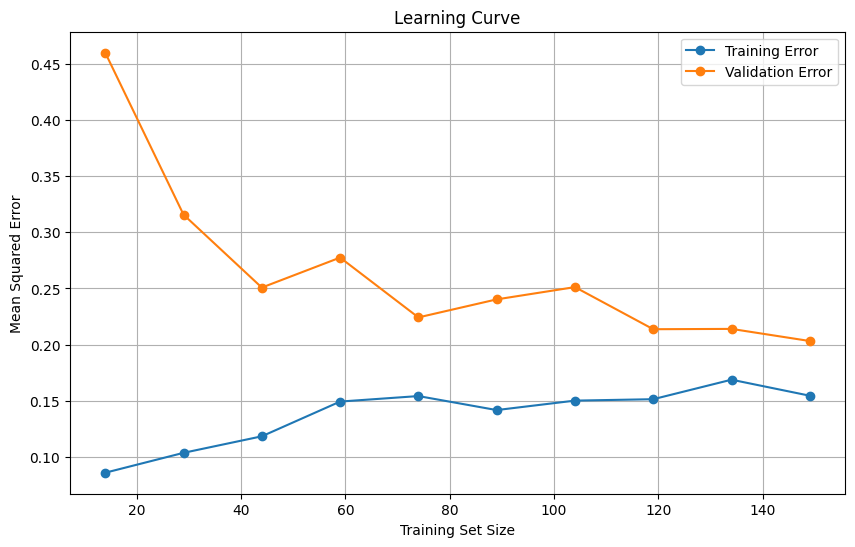

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

mapping = {'R':0, 'M':1}
Y_train = Y_train.map(mapping)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Convert negative MSE to positive for plotting
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()